In [38]:
import sys
sys.path.append('../src')

import data_exploration

# Caminho para o arquivo CSV
file_path = '../data/new_logs_labels.csv'

# Chamar a função para carregar e inspecionar os dados
df = data_exploration.load_data(file_path)
# data_exploration.inspect_data(df)



In [39]:
data_exploration.create_metadata_file(df, '../data/metadata.csv')

Metadados salvos em data/metadata.csv


In [40]:
import importlib
importlib.reload(data_exploration)

<module 'data_exploration' from '/Users/patricia/Documents/code/python/personality-detection/notebooks/../src/data_exploration.py'>

In [41]:
X, y = data_exploration.split_features_and_target(df)

In [42]:
# Exibe os labels das colunas de X e y
print(X.columns)
print(y.columns)

Index(['id_log', 'aluno', 'grupo', 'num_dia', 'num_log', 'log_type',
       'ultimo_passo_correto', 'verificado_com_mouse',
       'verificado_com_teclado', 'idle_time_acumulado',
       ...
       'misc_OI_Mt_Plus_Sb_total', 'misc_OI_Dv_Plus_Sb_total',
       'misc_EqSec_Distrib_MtTerm_total', 'misc_OI_Mt_Minus_Mt_Plus_total',
       'misc_OI_Mt_Minus_Mt_Minus_total', 'misc_OI_Dv_Plus_Ad_total',
       'misc_EqPrim_Mt_Inc_total', 'misc_EqPrim_Dv_Inc_total',
       'misc_OI_Dv_Minus_Dv_Minus_total',
       'misc_EqSec_OpFrac_MMC_MtNumerador_total'],
      dtype='object', length=336)
Index(['traco_amabilidade_fator', 'traco_extrovercao_fator',
       'traco_conscienciosidade_fator', 'traco_abertura_fator',
       'traco_neuroticismo_fator'],
      dtype='object')


In [43]:
data_exploration.inspect_data(X)

Primeiras linhas do DataFrame:
   id_log  aluno  grupo  num_dia  num_log           log_type  \
0    8224      1      2        1        1  step_verification   
1  527786      1      2        1        2          user_idle   
2  527787      1      2        1        3          user_idle   
3  527788      1      2        1        4          user_idle   
4  527789      1      2        1        5          user_idle   

   ultimo_passo_correto  verificado_com_mouse  verificado_com_teclado  \
0                     0                     0                       1   
1                     1                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   idle_time_acumulado  ...  misc_OI_Mt_Plus_Sb_total  \
0                    0  ...                         0   
1                    2  ...    

In [44]:
data_exploration.inspect_data(y)

Primeiras linhas do DataFrame:
   traco_amabilidade_fator  traco_extrovercao_fator  \
0                 0.149254                 0.179104   
1                 0.149254                 0.179104   
2                 0.149254                 0.179104   
3                 0.149254                 0.179104   
4                 0.149254                 0.179104   

   traco_conscienciosidade_fator  traco_abertura_fator  \
0                       0.223881              0.208955   
1                       0.223881              0.208955   
2                       0.223881              0.208955   
3                       0.223881              0.208955   
4                       0.223881              0.208955   

   traco_neuroticismo_fator  
0                  0.238806  
1                  0.238806  
2                  0.238806  
3                  0.238806  
4                  0.238806  


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Da

In [45]:
# Cria um novo dataframe que contém y concatenado com X
new_df = data_exploration.concat_features_and_target(X, y)



In [46]:
# Pegar a primeira instância de cada aluno
first_instances = new_df.groupby('aluno').first().reset_index()

# Selecionar apenas as colunas desejadas
first_instances = first_instances[y.columns]

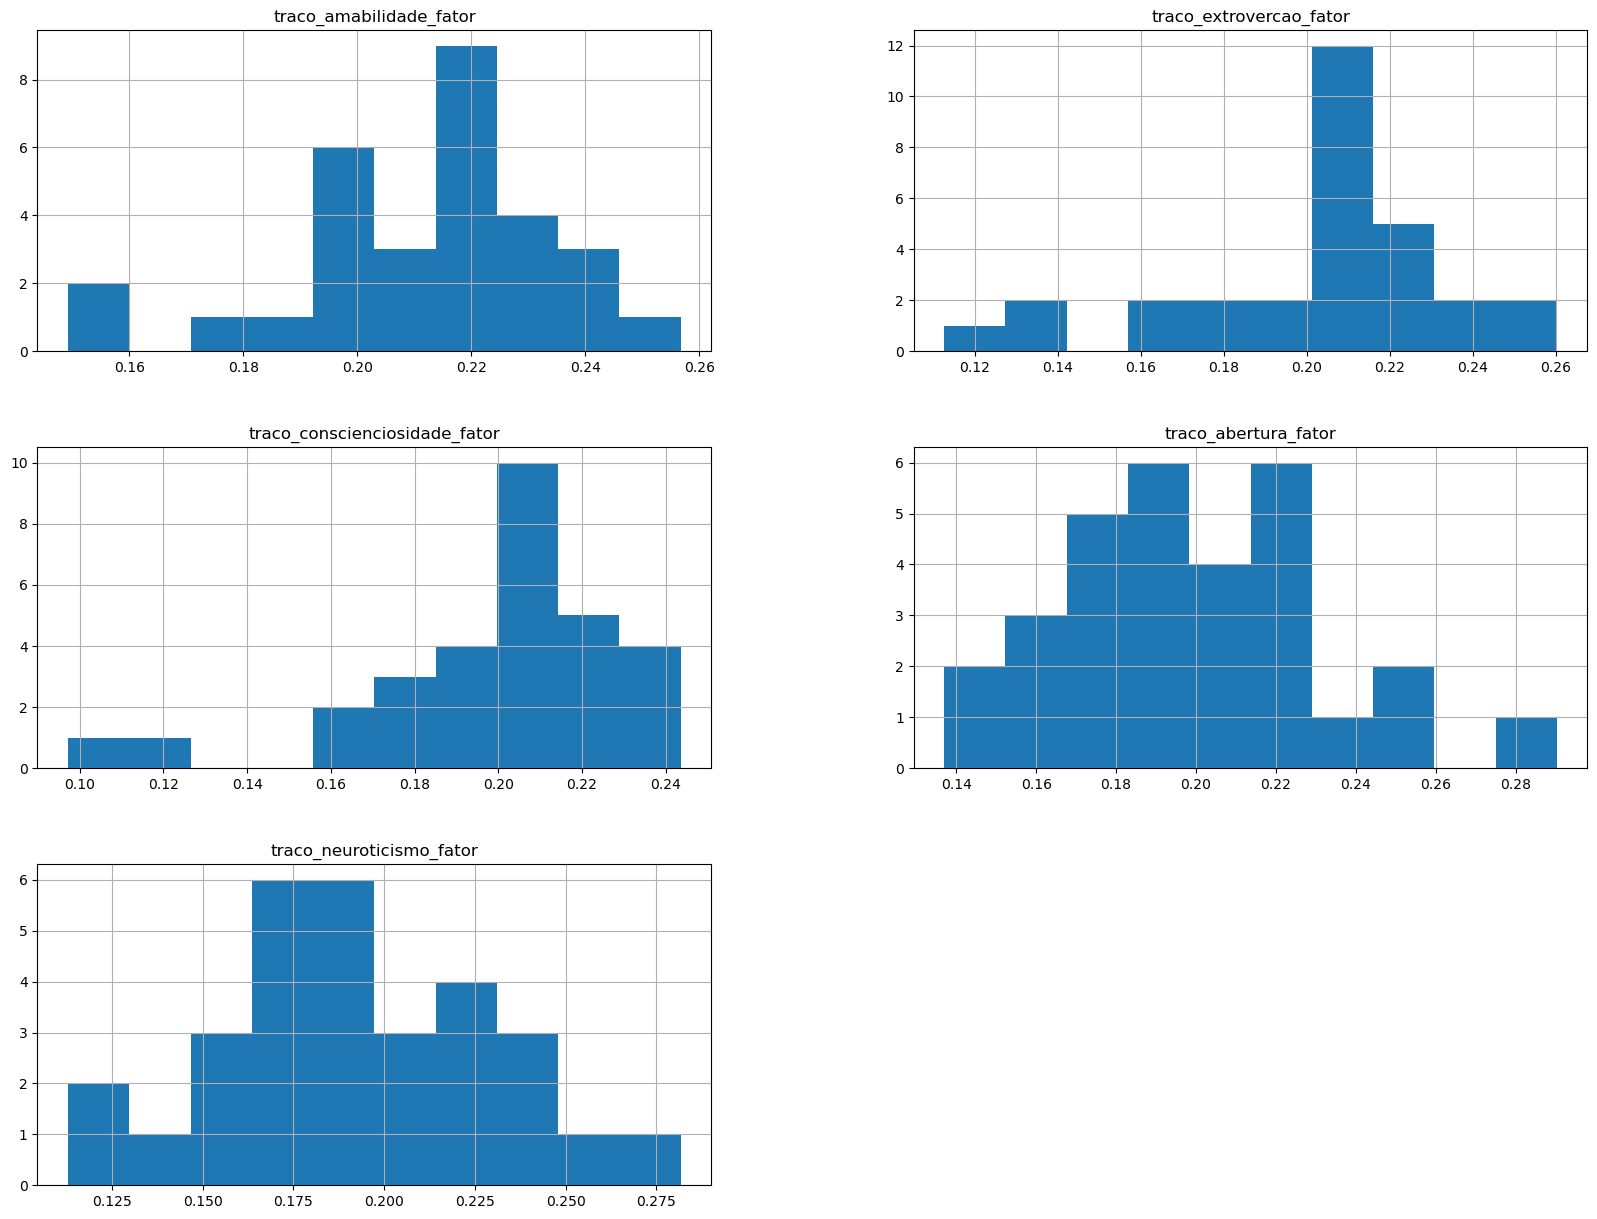

In [47]:
data_exploration.vis_histogram(first_instances, 10)